In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 📌 윈도우 기본 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Pretendard'
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_2022 = pd.read_csv("혼잡도_2022_위치포함.csv")
df_2023 = pd.read_csv("혼잡도_2023_위치포함.csv")

# 2. 병합
df = pd.concat([df_2022, df_2023], ignore_index=True)

In [11]:
import numpy as np

# -99를 NaN으로 변환 (congestion 컬럼만)
df['congestion'] = df['congestion'].replace(-99, np.nan)

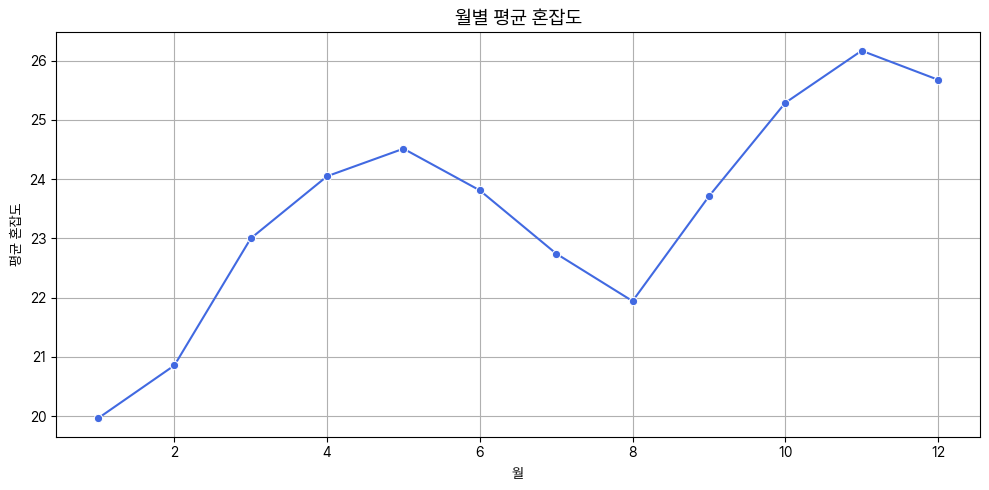

C:\Users\somee\AppData\Local\Temp\ipykernel_18776\2647434628.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values, palette='coolwarm')


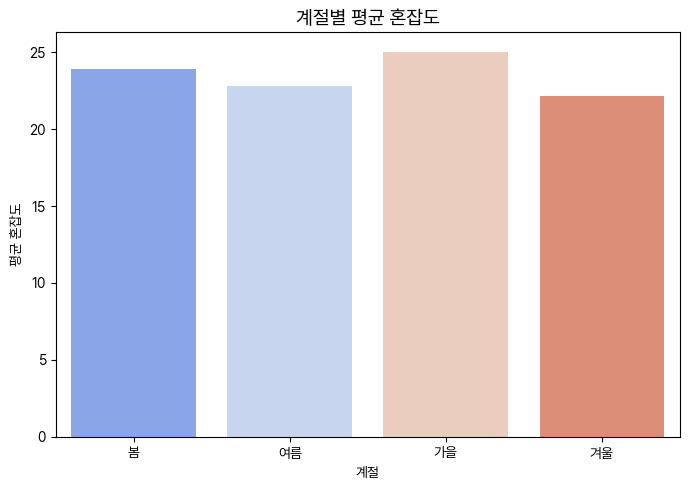

In [12]:
# 3. 계절 컬럼 추가
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

df['season'] = df['month'].apply(get_season)

# 4. 샘플링 (예: 10만건만 랜덤 추출)
df_sampled = df.sample(n=100_000, random_state=42)

# 5. 월별 평균
monthly_avg = df.groupby('month')['congestion'].mean()

# 6. 계절별 평균
seasonal_avg = df.groupby('season')['congestion'].mean().reindex(['봄', '여름', '가을', '겨울'])

# 7. 시각화
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o', color='royalblue')
plt.title('월별 평균 혼잡도', fontsize=14)
plt.xlabel('월')
plt.ylabel('평균 혼잡도')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values, palette='coolwarm')
plt.title('계절별 평균 혼잡도', fontsize=14)
plt.xlabel('계절')
plt.ylabel('평균 혼잡도')
plt.tight_layout()
plt.show()

C:\Users\somee\AppData\Local\Temp\ipykernel_18776\2096578797.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values,


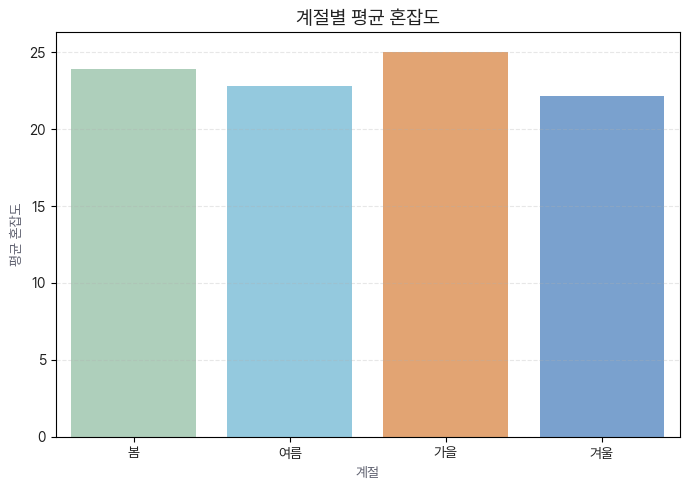

In [28]:
# 계절별 색상 수동 지정
season_palette = {
    '봄': '#A8D5BA',    # 연두빛
    '여름': '#87CEEB',  # 하늘색
    '가을': '#F4A261',  # 가을 오렌지
    '겨울': '#6CA0DC'   # 겨울 블루
}

# 계절별 평균 혼잡도 막대그래프
plt.figure(figsize=(7, 5))
sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values,
            palette=[season_palette[season] for season in seasonal_avg.index])

plt.title('계절별 평균 혼잡도', fontsize=14, color='#202020')
plt.xlabel('계절', color='#5E606F')
plt.ylabel('평균 혼잡도', color='#5E606F')
plt.xticks(color='#202020')
plt.yticks(color='#202020')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\somee\AppData\Local\Temp\ipykernel_18776\1460806867.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weektype_avg.index, y=weektype_avg.values, palette='pastel')


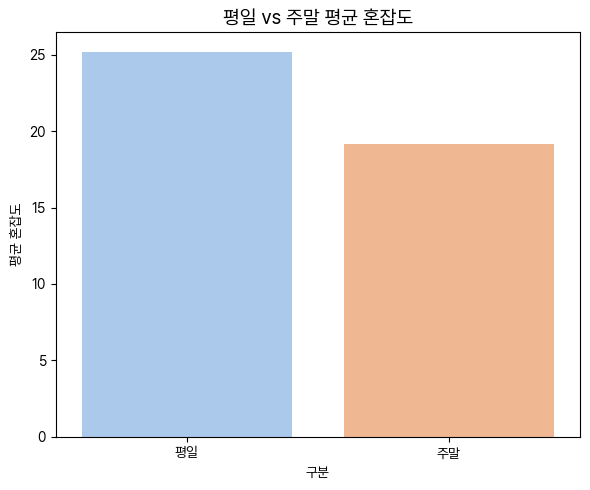

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 요일 컬럼이 없다면 datetime으로부터 생성
# (year, month, day 컬럼이 있는 경우)
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df['weekday'] = df['date'].dt.weekday  # 0: 월요일, ..., 6: 일요일

# 주말 여부 컬럼 생성
df['week_type'] = df['weekday'].apply(lambda x: '주말' if x >= 5 else '평일')

# 평균 혼잡도 계산
weektype_avg = df.groupby('week_type')['congestion'].mean().reindex(['평일', '주말'])

# 시각화
plt.figure(figsize=(6, 5))
sns.barplot(x=weektype_avg.index, y=weektype_avg.values, palette='pastel')
plt.title('평일 vs 주말 평균 혼잡도', fontsize=14)
plt.xlabel('구분')
plt.ylabel('평균 혼잡도')
plt.tight_layout()
plt.show()

C:\Users\somee\AppData\Local\Temp\ipykernel_18776\1457459540.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_avg.index, y=group_avg.values, palette='Set2')


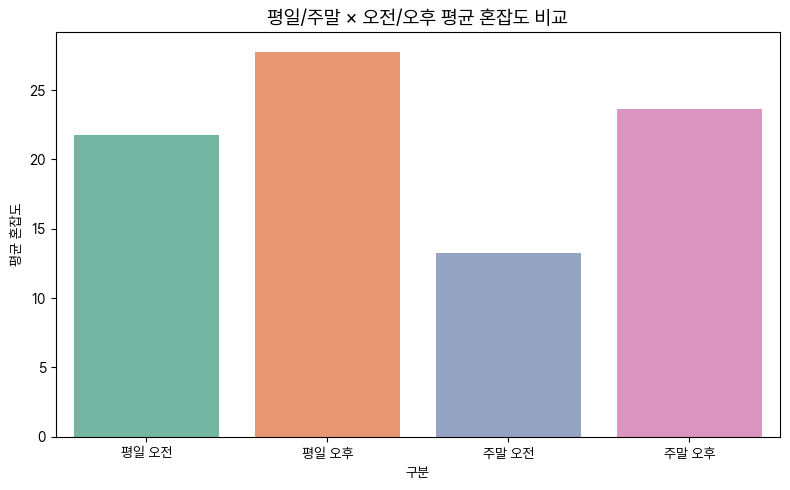

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 요일 및 주말/평일 분류
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df['weekday'] = df['date'].dt.weekday
df['week_type'] = df['weekday'].apply(lambda x: '주말' if x >= 5 else '평일')

# ✅ 오전/오후 분류 (0~11: 오전 / 12~23: 오후)
df['time_type'] = df['hour'].apply(lambda x: '오전' if x < 12 else '오후')

# ✅ 복합 조건 조합 컬럼
df['group'] = df['week_type'] + ' ' + df['time_type']

# ✅ 그룹별 평균 혼잡도 계산
group_avg = df.groupby('group')['congestion'].mean().reindex(['평일 오전', '평일 오후', '주말 오전', '주말 오후'])

# ✅ 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x=group_avg.index, y=group_avg.values, palette='Set2')
plt.title('평일/주말 × 오전/오후 평균 혼잡도 비교', fontsize=14)
plt.xlabel('구분')
plt.ylabel('평균 혼잡도')
plt.tight_layout()
plt.show()

C:\Users\somee\AppData\Local\Temp\ipykernel_18776\315736096.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_avg.index, y=group_avg.values, palette=bar_colors)


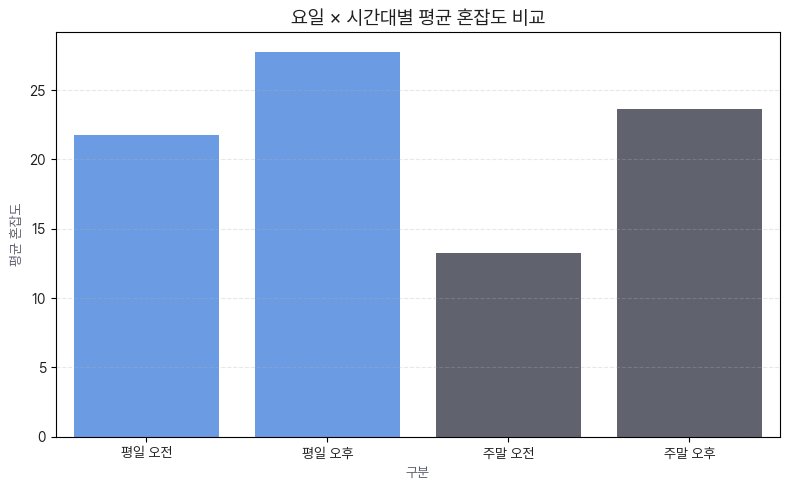

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 발표 색상 코드
highlight_color = '#5797F7'  # 파랑 → 평일
sub_color = '#5E606F'        # 회색 → 주말
main_color = '#202020'       # 검정 → 본문

# 평일 그룹 (강조 대상)
highlight_group = ['평일 오전', '평일 오후']

# 색상 리스트 구성
bar_colors = [
    highlight_color if label in highlight_group else sub_color
    for label in group_avg.index
]

# 그래프 그리기
plt.figure(figsize=(8, 5))
sns.barplot(x=group_avg.index, y=group_avg.values, palette=bar_colors)

# 스타일링
plt.title('요일 × 시간대별 평균 혼잡도 비교', fontsize=14, color=main_color)
plt.xlabel('구분', color=sub_color)
plt.ylabel('평균 혼잡도', color=sub_color)
plt.xticks(color=main_color)
plt.yticks(color=main_color)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


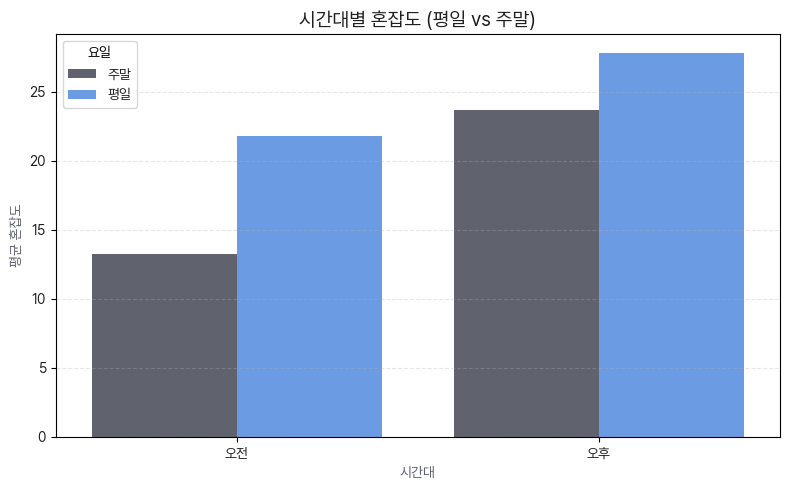

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 시간대 + 요일 변수로 집계
group_df = df.groupby(['time_type', 'week_type'])['congestion'].mean().reset_index()

# 색상 설정
palette = {
    '평일': '#5797F7',   # 파랑 강조
    '주말': '#5E606F'    # 회색
}

# 그래프
plt.figure(figsize=(8, 5))
sns.barplot(data=group_df, x='time_type', y='congestion', hue='week_type', palette=palette)

# 스타일
plt.title('시간대별 혼잡도 (평일 vs 주말)', fontsize=14, color='#202020')
plt.xlabel('시간대', color='#5E606F')
plt.ylabel('평균 혼잡도', color='#5E606F')
plt.xticks(color='#202020')
plt.yticks(color='#202020')
plt.legend(title='요일', title_fontsize=10, labelcolor='#202020')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\somee\AppData\Local\Temp\ipykernel_18776\3677779279.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_avg.index, y=group_avg.values, palette=bar_colors)


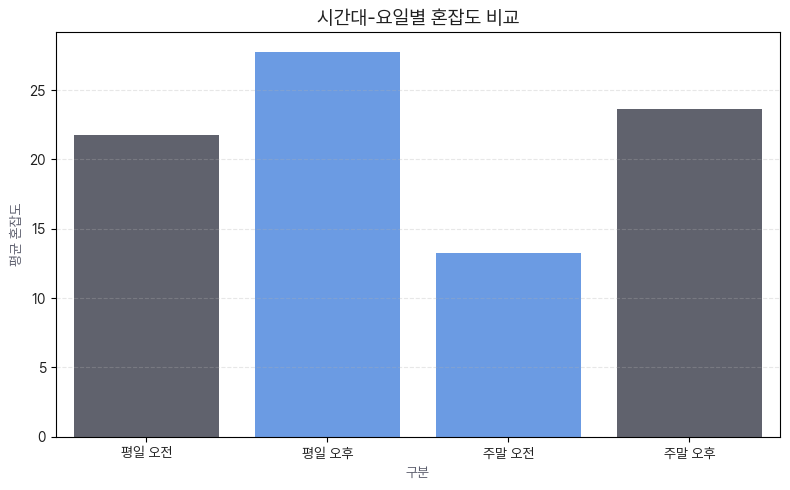

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 강조할 대상
highlight_targets = ['주말 오전', '평일 오후']

# 발표 색상코드
highlight_color = '#5797F7'  # 파랑 강조
sub_color = '#5E606F'        # 회색
main_color = '#202020'       # 본문 검정

# 색상 리스트 구성
bar_colors = [
    highlight_color if label in highlight_targets else sub_color
    for label in group_avg.index
]

# 막대그래프
plt.figure(figsize=(8, 5))
sns.barplot(x=group_avg.index, y=group_avg.values, palette=bar_colors)

# 스타일링
plt.title('시간대-요일별 혼잡도 비교', fontsize=14, color=main_color)
plt.xlabel('구분', color=sub_color)
plt.ylabel('평균 혼잡도', color=sub_color)
plt.xticks(color=main_color)
plt.yticks(color=main_color)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [34]:
hour_labels = {
    5: '05시', 6: '06시', 7: '07시', 8: '08시', 9: '09시', 10: '10시', 11: '11시',
    12: '12시', 13: '13시', 14: '14시', 15: '15시', 16: '16시', 17: '17시',
    18: '18시', 19: '19시', 20: '20시', 21: '21시', 22: '22시', 23: '23시',
    0: '00시', 1: '01시'
}


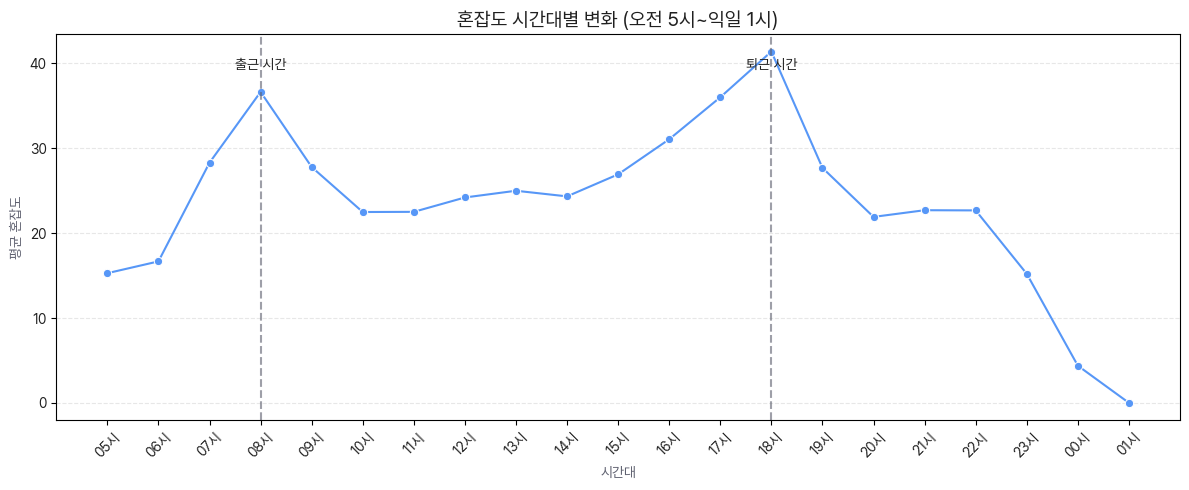

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# 원하는 시간 순서
hour_order = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1]
hour_labels = [hour_labels[h] for h in hour_order]

# 혼잡도 계산 후 재정렬
hourly_avg = df[df['hour'].isin(hour_order)].groupby('hour')['congestion'].mean()
hourly_avg = hourly_avg.reindex(hour_order)

# 시각화
plt.figure(figsize=(12, 5))
sns.lineplot(x=range(len(hour_order)), y=hourly_avg.values, marker='o', color='#5797F7')

# x축 커스터마이징
plt.xticks(ticks=range(len(hour_order)), labels=hour_labels, rotation=45, color='#202020')
plt.yticks(color='#202020')

# 제목 및 스타일
plt.title('혼잡도 시간대별 변화 (오전 5시~익일 1시)', fontsize=14, color='#202020')
plt.xlabel('시간대', color='#5E606F')
plt.ylabel('평균 혼잡도', color='#5E606F')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 출근/퇴근 시간 강조
plt.axvline(x=3, color='#5E606F', linestyle='--', alpha=0.6)   # 8시 위치
plt.text(3, hourly_avg.max()*0.95, '출근 시간', color='#202020', ha='center')

plt.axvline(x=13, color='#5E606F', linestyle='--', alpha=0.6)  # 18시 위치
plt.text(13, hourly_avg.max()*0.95, '퇴근 시간', color='#202020', ha='center')

plt.tight_layout()
plt.show()
